# 2020-01-14_EcN_RelativeExpression_AllReplicates

Measured fluorescence from RPU construct with strong RBS in each landing pad (and eventually also on p15a origin).

In [2]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [4]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [5]:
strains = ['AJT472','AJT473','AJT474','AJT476']

In [6]:
reps = ['r1','r2','r3']

In [7]:
# RPU standard fluorescence values
%store -r AJT472_r1_au_store 
%store -r AJT472_r2_au_store 
%store -r AJT472_r3_au_store 

%store -r AJT473_r1_au_store 
%store -r AJT473_r2_au_store 
%store -r AJT473_r3_au_store 

%store -r AJT474_r1_au_store 
%store -r AJT474_r2_au_store 
%store -r AJT474_r3_au_store 

%store -r AJT476_r1_au_store 
%store -r AJT476_r2_au_store 
%store -r AJT476_r3_au_store 



In [8]:
data_dict = {'au': 
        {'AJT472': {'r1': AJT472_r1_au_store,
                    'r2': AJT472_r2_au_store,
                    'r3': AJT472_r3_au_store},
         'AJT473': {'r1': AJT473_r1_au_store,
                    'r2': AJT473_r2_au_store,
                    'r3': AJT473_r3_au_store},
         'AJT474': {'r1': AJT474_r1_au_store,
                    'r2': AJT474_r2_au_store,
                    'r3': AJT474_r3_au_store},
         'AJT476': {'r1': AJT476_r1_au_store,
                    'r2': AJT476_r2_au_store,
                    'r3': AJT476_r3_au_store}}}

data = {'AJT472': [AJT472_r1_au_store, AJT472_r2_au_store, AJT472_r3_au_store],
       'AJT473': [AJT473_r1_au_store, AJT473_r2_au_store, AJT473_r3_au_store],
       'AJT474': [AJT474_r1_au_store, AJT474_r2_au_store, AJT474_r3_au_store],
       'AJT476': [AJT476_r1_au_store, AJT476_r2_au_store, AJT476_r3_au_store]}
        

In [9]:
melted = pd.melt(pd.DataFrame(data))

In [10]:
display(melted)

,variable,value
0,AJT472,1162.500000
1,AJT472,1089.959961
2,AJT472,1027.650024
3,AJT473,967.200012
4,AJT473,951.390015
5,AJT473,1017.419983
6,AJT474,967.200012
7,AJT474,890.010010
8,AJT474,882.570007
9,AJT476,5054.549805


In [8]:
np.std(data['AJT472'])

55.10505257361895

In [9]:
% store -r means_NOTgates_all # from 2020-10-05_EcN_NOTgates_AllReplicates_v2_TESTER
% store -r stdevs_NOTgates_all # from 2020-10-05_EcN_NOTgates_AllReplicates_v2_TESTER

no stored variable # from 2020-10-05_EcN_NOTgates_AllReplicates_v2_TESTER
no stored variable # from 2020-10-05_EcN_NOTgates_AllReplicates_v2_TESTER


In [10]:
print(means_NOTgates_all['au']['AJT206'], stdevs_NOTgates_all['au']['AJT206'])


33.25156319141388 4.310965627978483


In [11]:
import random

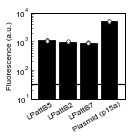

In [34]:
rows = 1
cols = 1

fig_RPUg, ax_RPUg = plt.subplots(rows,cols, figsize=(2*cols,1.8*rows)) # row, column format
plt.tight_layout() #tidies up spacing between plots

# ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
# for spine in ax.spines.values():
#     spine.set_edgecolor('k')

for spine in ax_RPUg.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

xdata_RPUg = np.ones((len(data['AJT472']),), dtype=int)

ax_RPUg.bar([1,2,3,4], [np.mean(data['AJT472']), np.mean(data['AJT473']), np.mean(data['AJT474']), np.mean(data['AJT476'])], 
#             yerr = [np.std(data['AJT472']), np.std(data['AJT473']), np.std(data['AJT474']), np.std(data['AJT476'])], 
            color = 'black', zorder = 1, 
            edgecolor = 'black')#, linewidth = 1)#, 
#             error_kw=dict(lw=1, capsize=4, capthick=1, ecolor = 'black'))

y_data = [data['AJT472'], data['AJT473'], data['AJT474'], data['AJT476']]

for i, d in enumerate(y_data):
    ax_RPUg.scatter([i+1]*len(d), d, 
                color = 'white', zorder = 2, s=12,
                edgecolor = 'black', linewidth = 0.5)

# ax_RPUg.scatter(y = melted[''], ax = ax_RPUg,
#             color = 'white', zorder = 2, 
#             edgecolor = 'black', linewidth = 0.5, size=3)


# print(pd.Series(xdata_RPUg))
# print(pd.Series(data_RPUg))
# print(pd.concat((pd.Series(xdata_RPUg), pd.Series(data_RPUg)), axis = 1))

# sns.swarmplot(data = pd.concat((pd.Series(xdata_RPUg), pd.Series(data_RPUg)), axis = 1), 
#               ax = ax_RPUg, size = 10, color = 'white', edgecolor = 'black', linewidth = 2)

ax_RPUg.set_xscale('linear')
ax_RPUg.set_yscale('log')

ax_RPUg.set_xlim(0.25,4.75)
ax_RPUg.set_ylim(10,10000)

ax_RPUg.set_ylabel('Fluorescence (a.u.)', size = 8, color = 'black', labelpad = 2)
ax_RPUg.yaxis.label.set_color('black')

ax_RPUg.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2, colors = 'black')
ax_RPUg.tick_params(which='minor', length = 2, width = 0.5, direction = 'in', colors = 'black')
ax_RPUg.set_xticks([0.675,1.675,2.675,3.4])
ax_RPUg.set_xticklabels(['LPattB5','LPattB2','LPattB7','Plasmid (p15a)'], rotation = 30)
ax_RPUg.grid(False)

ax_RPUg.plot([0.25,4.75], [means_NOTgates_all['au']['AJT206'],means_NOTgates_all['au']['AJT206']], color ='black',linestyle ='-', zorder=3)
# ax_RPUg.fill_between([0.25,4.75], [means_NOTgates_all['au']['AJT206']-stdevs_NOTgates_all['au']['AJT206'],means_NOTgates_all['au']['AJT206']-stdevs_NOTgates_all['au']['AJT206']], 
#                                    [means_NOTgates_all['au']['AJT206']+stdevs_NOTgates_all['au']['AJT206'],means_NOTgates_all['au']['AJT206']+stdevs_NOTgates_all['au']['AJT206']], 
#                      color='black', alpha=0.2, zorder = 3)
# ax_RPUg.plot(30, 0.25,4.75, colors = 'lightgray')

# # adding RPUG label and arrow
# ax_RPUg.arrow(2.75,means['au']['AJT280'],-0.5,0, 
#               head_width=200, head_length=0.2, width = 50,
#               fc='black', ec='black', clip_on = False) # clip_on = False allows it to continue outside of axes
# ax_RPUg.text(2.8, means['au']['AJT280'], 
#              ('1 RPU$_{\mathrm{G}}$' +'\n({} a.u.)'.format(round(means['au']['AJT280'], 2))), # \mathrm gets rid of italics of Latex font, which is created by the $...$ for making subscript
#              verticalalignment = 'center', horizontalalignment = 'left', 
#              fontsize = 30, color = 'black')

# #autofluorescence label and arrow
# ax_RPUg.plot([0.25,1.75],[means['au']['AJT206'], means['au']['AJT206']], 
#               linestyle = '--', linewidth = 4, color = 'lightgrey')

# ax_RPUg.arrow(2.75,means['au']['AJT206'],-0.5,0, 
#               head_width=8, head_length=0.2, width = 2,
#               fc='black', ec='black', clip_on = False) # clip_on = False allows it to continue outside of axes
# ax_RPUg.text(2.8, means['au']['AJT206'], 
#              ('Autofluor.' +'\n({} a.u.)'.format(round(means['au']['AJT206'], 2))), 
# #              ('Autofluor.' +' {} a.u.'.format(round(means['au']['AJT206'], 2))), 
#              verticalalignment = 'center', horizontalalignment = 'left', 
#              fontsize = 30, color = 'black')


In [35]:
# fig_RPUg.savefig('Fig1E_EcN_LPsRelativeExpression_bar_AllPoints.pdf', bbox_inches = "tight", transparent = True)


In [14]:
print([np.mean(data['AJT472']), np.mean(data['AJT473']), np.mean(data['AJT474']), np.mean(data['AJT476'])])

[1093.3699951171875, 978.6700032552084, 913.260009765625, 4994.409993489583]


In [15]:
np.std(data['AJT476'])

110.28058283732467